<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning/blob/main/online_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:

Online payments have become increasingly popular, but they also introduce the risk of fraudulent transactions. Fraudsters employ various techniques to steal money from individuals and businesses. Detecting and preventing these fraudulent activities is crucial for maintaining a secure and trustworthy online payment ecosystem.

Problem Statement:

This project aims to develop a machine learning model capable of effectively detecting fraudulent online payment transactions. The model will be trained on historical data containing both legitimate and fraudulent transactions. The goal is to build a model that can accurately classify new, unseen transactions as either fraudulent or legitimate.

## About Dataset :

The below column reference:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

Dataset : https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
df = pd.read_csv('/content/online_fraud.csv', nrows=100000)

In [6]:
#shape of dataset
df.shape

(100000, 11)

In [7]:
#first five observations
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [10]:
#null values in dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# dropping the null values
df.dropna(inplace=True)

In [12]:
#dataset after dropping the null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#statistical summary of data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


<Axes: xlabel='isFraud', ylabel='count'>

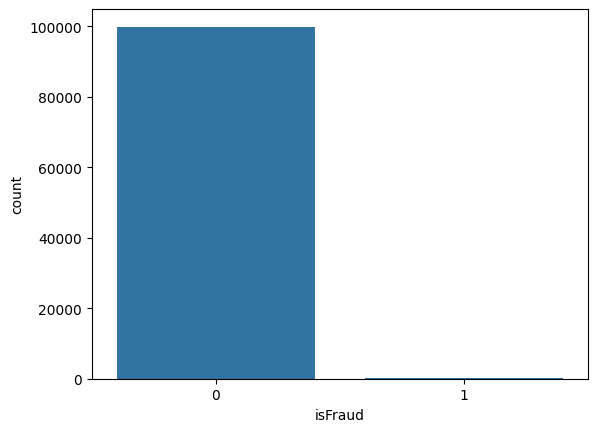

In [14]:
#distribution of target variable
sns.countplot(df, x='isFraud')

In [15]:
#distribution of target variable
df.isFraud.value_counts()

isFraud
0    99884
1      116
Name: count, dtype: int64

In [16]:
#percentage of fradulent transactions

total_transactions = len(df)
fraud_transactions = df['isFraud'].sum()

percentage_of_fraud_transaction = (fraud_transactions/total_transactions)*100
print(percentage_of_fraud_transaction)

0.116


<Axes: xlabel='type', ylabel='count'>

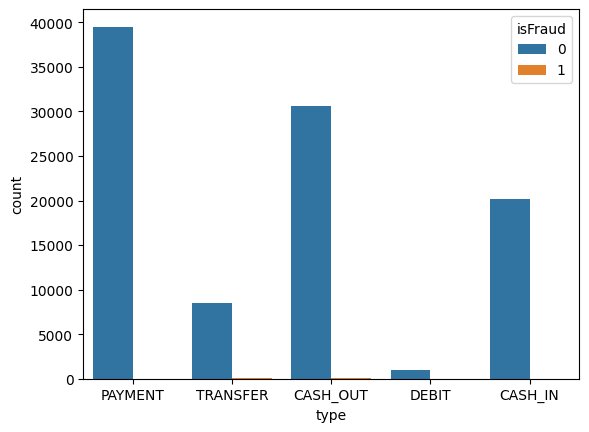

In [17]:
#distribution of type of transactions
sns.countplot(df,x='type', hue='isFraud')

<Axes: >

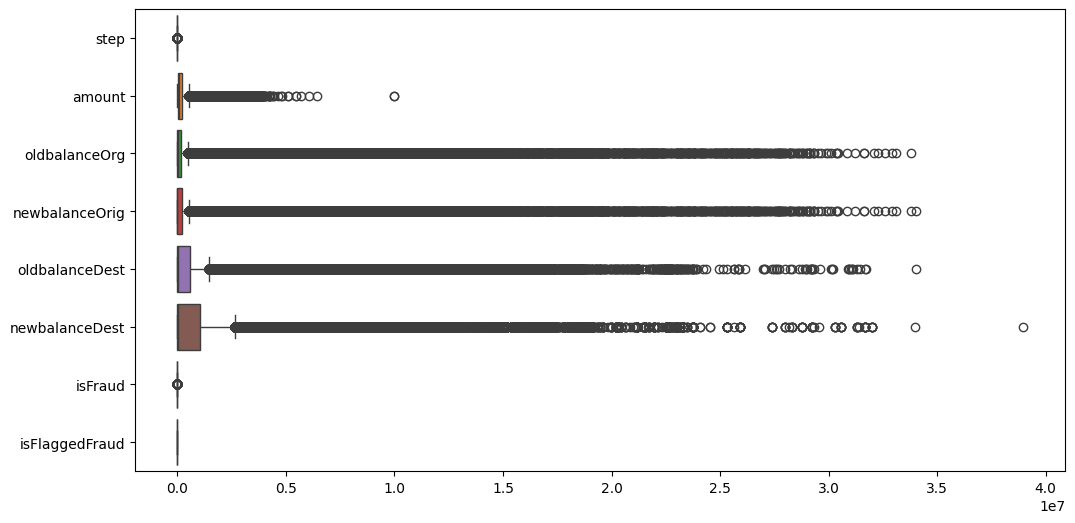

In [18]:
#outliers in data
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient='h')

In [19]:
'''
column = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

def remove_outlier(df,column):
  for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df
'''

In [20]:
'''
df = remove_outlier(df,column)
'''

In [21]:
#length of dataframe
len(df)

46953

## Machine Learning Approach

In [22]:
#dropping features
df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [23]:
df.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1


In [24]:
df['type'] = df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4})

In [25]:
df.type.value_counts()

type
1    30528
0    13308
3     1566
2      988
4      563
Name: count, dtype: int64

In [26]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,1,1,1864.28,21249.0,19384.72,0.00,0.00,0
2,1,3,181.00,181.0,0.00,0.00,0.00,1
3,1,0,181.00,181.0,0.00,21182.00,0.00,1
4,1,1,11668.14,41554.0,29885.86,0.00,0.00,0
5,1,1,7817.71,53860.0,46042.29,0.00,0.00,0
...,...,...,...,...,...,...,...,...
99990,10,0,231788.22,24902.0,0.00,0.00,183153.72,0
99991,10,0,222796.86,7487.0,0.00,120054.97,52596.25,0
99992,10,0,173609.46,50462.0,0.00,39334.53,118762.90,0
99996,10,1,18345.49,6206.0,0.00,0.00,0.00,0


<Axes: >

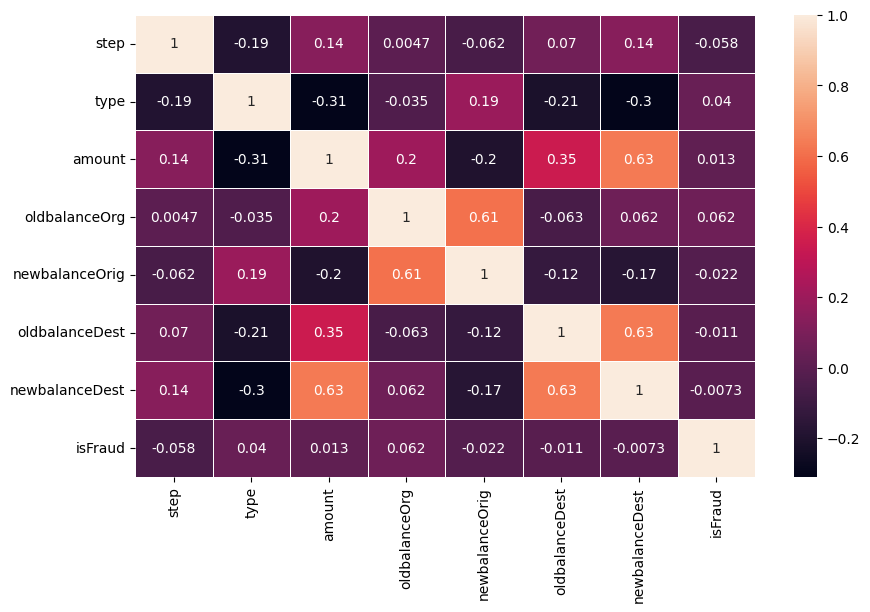

In [27]:
#heatmap representing correaltion among different features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [32]:
X = df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
Y = df['isFraud']
X.shape, Y.shape

((46953, 7), (46953,))

In [33]:
#splitting the data into test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
#shape of test and train data
X.shape, x_train.shape, x_test.shape

((46953, 7), (37562, 7), (9391, 7))

In [35]:
# training data on different models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()
dc = DecisionTreeClassifier()

In [36]:
for model in (lr,rfc,dc):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy_of_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} ---> {accuracy_of_test_data}')
  print(classification_report(y_pred,y_test))
  print(confusion_matrix(y_test,y_pred))
  print('-'*80)

LogisticRegression() ---> 0.9980832712171228
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9383
           1       0.27      0.75      0.40         8

    accuracy                           1.00      9391
   macro avg       0.64      0.87      0.70      9391
weighted avg       1.00      1.00      1.00      9391

[[9367    2]
 [  16    6]]
--------------------------------------------------------------------------------
RandomForestClassifier() ---> 0.998509210946651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9383
           1       0.36      1.00      0.53         8

    accuracy                           1.00      9391
   macro avg       0.68      1.00      0.77      9391
weighted avg       1.00      1.00      1.00      9391

[[9369    0]
 [  14    8]]
--------------------------------------------------------------------------------
DecisionTreeClassifier() ---> 0.99776

## Handling Imbalance with RandomOverSampler

In [38]:
# imbalanced dataset training data with random over sampler from imblearn
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
os_x,os_y = over_sampler.fit_resample(X,Y)
print('Original Dataset shape -', Counter(Y))
print()
print('Random oversampled data', Counter(os_y))

Original Dataset shape - Counter({0: 46865, 1: 88})

Random oversampled data Counter({0: 46865, 1: 46865})


In [39]:
for model in (lr,rfc,dc):
  model.fit(os_x,os_y)
  y_pred = model.predict(x_test)
  accuracy_of_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} ---> {accuracy_of_test_data}')
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('-'*80)

LogisticRegression() ---> 0.9127888403790864
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9369
           1       0.02      0.86      0.04        22

    accuracy                           0.91      9391
   macro avg       0.51      0.89      0.50      9391
weighted avg       1.00      0.91      0.95      9391

[[8553  816]
 [   3   19]]
--------------------------------------------------------------------------------
RandomForestClassifier() ---> 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9369
           1       1.00      1.00      1.00        22

    accuracy                           1.00      9391
   macro avg       1.00      1.00      1.00      9391
weighted avg       1.00      1.00      1.00      9391

[[9369    0]
 [   0   22]]
--------------------------------------------------------------------------------
DecisionTreeClassifier() ---> 1.0
              pre

## Handling Imbalance with SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smt, y_train_smt = smote.fit_resample(x_train,y_train)

In [43]:
print('Original Dataset shape -', Counter(y_train))
print()
print('Random oversampled data', Counter(y_train_smt))

Original Dataset shape - Counter({0: 37496, 1: 66})

Random oversampled data Counter({0: 37496, 1: 37496})


In [44]:
for model in (lr,rfc,dc):
  model.fit(x_train_smt, y_train_smt)
  y_pred = model.predict(x_test)
  accuracy_of_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} ---> {accuracy_of_test_data}')
  print('-'*80)

LogisticRegression() ---> 0.9166222979448408
--------------------------------------------------------------------------------
RandomForestClassifier() ---> 0.9976573314875945
--------------------------------------------------------------------------------
DecisionTreeClassifier() ---> 0.9961665424342455
--------------------------------------------------------------------------------


## Conclusion :

1. This project investigated online fraud detection using random forest, logistic regression, and decision tree models implemented in Python with libraries pandas, scikit-learn, and matplotlib.
2. Addressing the imbalanced nature of the dataset, we employed a random oversampling technique from the imbalanced-learn (imblearn) library, resulting in an 89% accuracy when applying logistic regression, while achieving a remarkable 100% accuracy with the Random Forest Classifier and Decision Tree models.
3. These predictive models prove essential for proactive fraud detection, mitigating financial losses, and ensuring the security of online transactions.
4. The success highlights the practical necessity of leveraging machine learning in fraud prevention across various sectors.
